In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/')

### Install `skforecast` library

In [2]:
# !pip install skforecast
import skforecast
skforecast.__version__

'0.8.0'

### Import data with pandas

In [74]:
import pandas as pd

# file_name = './drive/MyDrive/Colab Notebooks/data/Data_wIR.csv'
file_name = './Data/Data_wIR.csv'
data = pd.read_csv(file_name, index_col='Datetime', parse_dates=True, dtype='float32')
data.head()

,AUDUSD_Open,AUDUSD_High,AUDUSD_Low,AUDUSD_Close,AUD_InterestRate,EURUSD_Open,EURUSD_High,EURUSD_Low,EURUSD_Close,EUR_InterestRate,...,USDCHF_High,USDCHF_Low,USDCHF_Close,CHF_InterestRate,USDJPY_Open,USDJPY_High,USDJPY_Low,USDJPY_Close,USD_InterestRate,JPY_InterestRate
Datetime,,,,,,,,,,,,,,,,,,,,,
2002-05-01,0.5381,0.5404,0.5356,0.5400,4.25,0.9005,0.9089,0.8990,0.9063,4.25,...,1.6202,1.5954,1.6023,1.75,128.529999,128.710007,127.160004,127.389999,1.75,0.0
2002-05-02,0.5402,0.5408,0.5351,0.5361,4.25,0.9063,0.9083,0.9010,0.9030,4.25,...,1.6149,1.5994,1.6095,1.25,127.419998,128.169998,126.910004,127.900002,1.75,0.0
2002-05-03,0.5362,0.5402,0.5341,0.5396,4.25,0.9031,0.9178,0.9024,0.9173,4.25,...,1.6128,1.5845,1.5863,1.25,127.879997,128.050003,126.830002,126.949997,1.75,0.0
2002-05-06,0.5407,0.5409,0.5373,0.5399,4.25,0.9164,0.9188,0.9133,0.9179,4.25,...,1.5949,1.5831,1.5849,1.25,127.019997,127.550003,126.910004,127.180000,1.75,0.0
2002-05-07,0.5395,0.5432,0.5383,0.5388,4.25,0.9181,0.9193,0.9114,0.9143,4.25,...,1.6007,1.5819,1.5907,1.25,127.160004,128.380005,126.730003,128.080002,1.75,0.0


In [75]:
data.info();

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5474 entries, 2002-05-01 to 2023-04-28
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AUDUSD_Open       5474 non-null   float32
 1   AUDUSD_High       5474 non-null   float32
 2   AUDUSD_Low        5474 non-null   float32
 3   AUDUSD_Close      5474 non-null   float32
 4   AUD_InterestRate  5474 non-null   float32
 5   EURUSD_Open       5474 non-null   float32
 6   EURUSD_High       5474 non-null   float32
 7   EURUSD_Low        5474 non-null   float32
 8   EURUSD_Close      5474 non-null   float32
 9   EUR_InterestRate  5474 non-null   float32
 10  GBPUSD_Open       5474 non-null   float32
 11  GBPUSD_High       5474 non-null   float32
 12  GBPUSD_Low        5474 non-null   float32
 13  GBPUSD_Close      5474 non-null   float32
 14  GBP_InterestRate  5474 non-null   float32
 15  USDCHF_Open       5474 non-null   float32
 16  USDCHF_High       5474 n

### Drop 'Open', 'High', 'Low' Price columns for each symbols

In [76]:
data_ = data.copy()
columns_to_drop = ['Open', 'High', 'Low']
for col in columns_to_drop:
  data = data[data.columns[~data.columns.str.contains(col)]]
data.head(5)

,AUDUSD_Close,AUD_InterestRate,EURUSD_Close,EUR_InterestRate,GBPUSD_Close,GBP_InterestRate,USDCHF_Close,CHF_InterestRate,USDJPY_Close,USD_InterestRate,JPY_InterestRate
Datetime,,,,,,,,,,,
2002-05-01,0.5400,4.25,0.9063,4.25,1.4652,4.0,1.6023,1.75,127.389999,1.75,0.0
2002-05-02,0.5361,4.25,0.9030,4.25,1.4632,4.0,1.6095,1.25,127.900002,1.75,0.0
2002-05-03,0.5396,4.25,0.9173,4.25,1.4691,4.0,1.5863,1.25,126.949997,1.75,0.0
2002-05-06,0.5399,4.25,0.9179,4.25,1.4684,4.0,1.5849,1.25,127.180000,1.75,0.0
2002-05-07,0.5388,4.25,0.9143,4.25,1.4670,4.0,1.5907,1.25,128.080002,1.75,0.0


### Train Test Split

In [12]:
train_data = data[data.index < '2020-05-01'].reset_index(drop=True)
test_data = data[data.index >= '2020-05-01'].reset_index(drop=True)
train_data.head()

,AUDUSD_Close,AUD_InterestRate,EURUSD_Close,EUR_InterestRate,GBPUSD_Close,GBP_InterestRate,USDCHF_Close,CHF_InterestRate,USDJPY_Close,USD_InterestRate,JPY_InterestRate
0,0.5400,4.25,0.9063,4.25,1.4652,4.0,1.6023,1.75,127.389999,1.75,0.0
1,0.5361,4.25,0.9030,4.25,1.4632,4.0,1.6095,1.25,127.900002,1.75,0.0
2,0.5396,4.25,0.9173,4.25,1.4691,4.0,1.5863,1.25,126.949997,1.75,0.0
3,0.5399,4.25,0.9179,4.25,1.4684,4.0,1.5849,1.25,127.180000,1.75,0.0
4,0.5388,4.25,0.9143,4.25,1.4670,4.0,1.5907,1.25,128.080002,1.75,0.0


### Import `skforecast` `lightgbm` libraries

In [13]:
# from skforecast.ForecasterAutoreg import ForecasterAutoreg
# from skforecast.ForecasterAutoregMultiSeries import ForecasterAutoregMultiSeries
from skforecast.ForecasterAutoregMultiVariate import ForecasterAutoregMultiVariate

# from skforecast.model_selection import backtesting_forecaster
# from skforecast.model_selection_multiseries import backtesting_forecaster_multiseries, backtesting_forecaster_multivariate
# from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection_multiseries import grid_search_forecaster_multiseries, grid_search_forecaster_multivariate

from lightgbm import LGBMRegressor

from skforecast.utils import save_forecaster, load_forecaster

import warnings
warnings.filterwarnings("ignore")

### Checking data standardization

In [14]:
from sklearn.preprocessing import MinMaxScaler

scalers = {}
train_scaled = train_data.copy()

# symbols = ['AUDUSD', 'EURUSD', 'GBPUSD', 'USDCHF', 'USDJPY']

for col in train_scaled.columns:
  scaler = MinMaxScaler(feature_range=(-1, 1))
  train_scaled[col + '_scaled'] = scaler.fit_transform(train_scaled[col].values.reshape(-1, 1))
  train_scaled.drop(series=col, inplace=True)
  scalers[col+'_scaler'] = scaler

In [15]:
train_scaled

,AUDUSD_Close_scaled,AUD_InterestRate_scaled,EURUSD_Close_scaled,EUR_InterestRate_scaled,GBPUSD_Close_scaled,GBP_InterestRate_scaled,USDCHF_Close_scaled,CHF_InterestRate_scaled,USDJPY_Close_scaled,USD_InterestRate_scaled,JPY_InterestRate_scaled
0,-0.956850,0.142857,-0.990527,1.0,-0.335485,0.380531,0.974457,0.428571,0.943876,-0.333333,-0.666667
1,-0.970421,0.142857,-1.000000,1.0,-0.339650,0.380531,0.990589,0.142857,0.963086,-0.333333,-0.666667
2,-0.958242,0.142857,-0.958950,1.0,-0.327363,0.380531,0.938606,0.142857,0.927303,-0.333333,-0.666667
3,-0.957198,0.142857,-0.957227,1.0,-0.328821,0.380531,0.935469,0.142857,0.935966,-0.333333,-0.666667
4,-0.961026,0.142857,-0.967561,1.0,-0.331737,0.380531,0.948465,0.142857,0.969867,-0.333333,-0.666667
...,...,...,...,...,...,...,...,...,...,...,...
4685,-0.612277,-1.000000,-0.485632,-1.0,-0.812099,-1.000000,-0.436433,-1.000000,0.192760,-1.000000,-1.000000
4686,-0.586909,-1.000000,-0.484312,-1.0,-0.799417,-1.000000,-0.430921,-1.000000,0.183042,-1.000000,-1.000000
4687,-0.578035,-1.000000,-0.486982,-1.0,-0.800479,-1.000000,-0.432019,-1.000000,0.170198,-1.000000,-1.000000
4688,-0.555242,-1.000000,-0.470619,-1.0,-0.789921,-1.000000,-0.435089,-1.000000,0.161158,-1.000000,-1.000000


In [16]:
scalers

{'AUDUSD_Close_scaler': MinMaxScaler(feature_range=(-1, 1)),
 'AUD_InterestRate_scaler': MinMaxScaler(feature_range=(-1, 1)),
 'EURUSD_Close_scaler': MinMaxScaler(feature_range=(-1, 1)),
 'EUR_InterestRate_scaler': MinMaxScaler(feature_range=(-1, 1)),
 'GBPUSD_Close_scaler': MinMaxScaler(feature_range=(-1, 1)),
 'GBP_InterestRate_scaler': MinMaxScaler(feature_range=(-1, 1)),
 'USDCHF_Close_scaler': MinMaxScaler(feature_range=(-1, 1)),
 'CHF_InterestRate_scaler': MinMaxScaler(feature_range=(-1, 1)),
 'USDJPY_Close_scaler': MinMaxScaler(feature_range=(-1, 1)),
 'USD_InterestRate_scaler': MinMaxScaler(feature_range=(-1, 1)),
 'JPY_InterestRate_scaler': MinMaxScaler(feature_range=(-1, 1))}

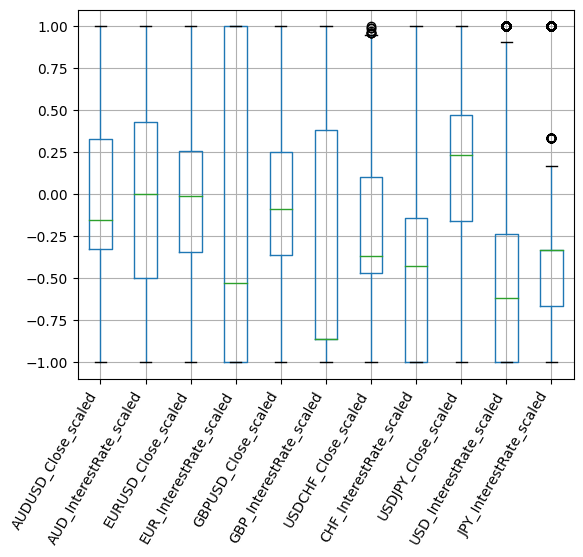

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = train_scaled.boxplot()
plt.xticks(rotation=60, ha='right')
plt.show();

In [18]:
test_scaled = test_data.copy()

for col in test_scaled.columns:
  scaler = scalers[col+'_scaler']
  test_scaled[col + '_scaled'] = scaler.transform(test_scaled[col].values.reshape(-1, 1))
  test_scaled.drop(columns=col, inplace=True)
  scalers[col+'_scaler'] = scaler

In [19]:
test_scaled

,AUDUSD_Close_scaled,AUD_InterestRate_scaled,EURUSD_Close_scaled,EUR_InterestRate_scaled,GBPUSD_Close_scaled,GBP_InterestRate_scaled,USDCHF_Close_scaled,CHF_InterestRate_scaled,USDJPY_Close_scaled,USD_InterestRate_scaled,JPY_InterestRate_scaled
0,-0.602811,-1.000000,-0.440879,-1.000000,-0.785110,-1.000000,-0.462312,-1.000000,0.171968,-1.000000,-1.0
1,-0.601246,-1.000000,-0.461375,-1.000000,-0.796293,-1.000000,-0.454381,-1.000000,0.163870,-1.000000,-1.0
2,-0.599436,-1.000000,-0.482532,-1.000000,-0.798209,-1.000000,-0.437889,-1.000000,0.156299,-1.000000,-1.0
3,-0.610780,-1.000000,-0.494445,-1.000000,-0.817722,-1.000000,-0.432019,-1.000000,0.140554,-1.000000,-1.0
4,-0.576957,-1.000000,-0.483221,-1.000000,-0.814015,-1.000000,-0.436590,-1.000000,0.147372,-1.000000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
779,-0.506246,-0.042857,-0.422104,0.647059,-0.788026,0.469027,-0.627269,0.285714,1.200501,0.809524,-1.0
780,-0.530849,-0.042857,-0.442802,0.647059,-0.803686,0.469027,-0.617567,0.285714,1.180048,0.809524,-1.0
781,-0.538296,-0.042857,-0.423253,0.647059,-0.790796,0.469027,-0.619113,0.285714,1.179294,0.809524,-1.0
782,-0.528900,-0.042857,-0.426812,0.647059,-0.784881,0.469027,-0.613959,0.285714,1.190783,0.809524,-1.0


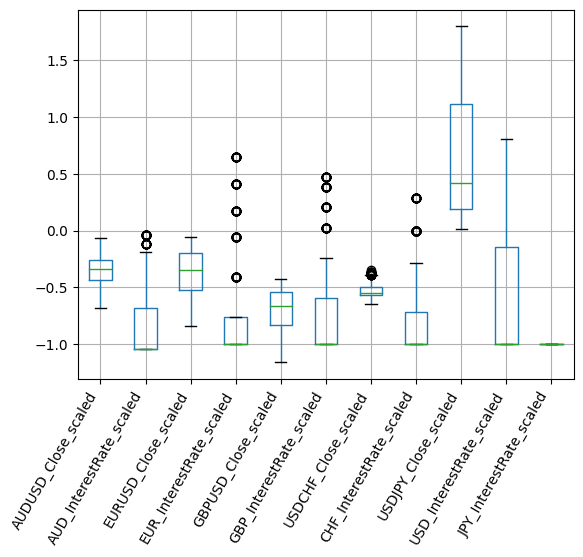

In [20]:
ax = test_scaled.boxplot()
plt.xticks(rotation=60, ha='right')
plt.show();

## Models Grid Search
### return_best param and save models

In [31]:
import timeit

# ForecasterAutoMultiVariate models grid_search
symbols = ['AUDUSD', 'EURUSD', 'GBPUSD', 'USDCHF', 'USDJPY']

lags_grid = [20, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40 ,50, 60, 70, 80 ,90 ,100]]

param_grid = {
    'n_estimators': [100, 200],
    'num_leaves': [31, 50],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [30, 50],
}

for symbol in symbols:
    series = list(train_data.columns[~train_data.columns.str.contains('InterestRate')])
    exog = []
    for exogs in list(train_data.columns[train_data.columns.str.contains('InterestRate')]):
        if (symbol[:3] in exogs) or (symbol[-3:] in exogs):
            exog.append(exogs)

    start = timeit.default_timer()

    start_train = 0
    end_train = start_train + 999

    multivariate_forecaster = ForecasterAutoregMultiVariate(
        regressor          = LGBMRegressor(random_state=123),
        lags               = 20,
        steps              = 10,
        level              = f'{symbol}_Close',
        transformer_series = MinMaxScaler(feature_range=(-1, 1)),
        transformer_exog   = MinMaxScaler(feature_range=(-1, 1)),
        forecaster_id      = f'{symbol.lower()}_lgbm_multivariate_forecaster'
    )

    multivariate_results_grid = grid_search_forecaster_multivariate(
        forecaster         = multivariate_forecaster,
        series             = train_data[series],
        exog               = train_data[exog],
        param_grid         = param_grid,
        lags_grid          = lags_grid,
        levels             = [f'{symbol}_Close'],
        steps              = 10,
        refit              = False,
        metric             = ['mean_squared_error', 'mean_absolute_error'],
        initial_train_size = len(train_data[start_train:end_train]),
        fixed_train_size   = True,
        return_best        = True,
        verbose            = False,
    )

    end = timeit.default_timer()
    print(f"Grid search time: {round(end - start, 1)}s")
    save_forecaster(multivariate_forecaster, file_name=f'./models/skforecast/{symbol.lower()}_lgbm_multivariate_forecaster.py', verbose=True)

48 models compared for 1 level(s). Number of iterations: 48.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/24 [00:00<?, ?it/s]

params grid:   0%|          | 0/24 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [  1   2   3   4   5   6   7   8   9  10  15  20  30  40  50  60  70  80
  90 100]
  Parameters: {'learning_rate': 0.05, 'max_depth': 30, 'n_estimators': 200, 'num_leaves': 50}
  Backtesting metric: 0.01722986084442226
  Levels: ['AUDUSD_Close']

Grid search time: 466.1s
ForecasterAutoregMultiVariate 
Regressor: LGBMRegressor(learning_rate=0.05, max_depth=30, n_estimators=200, num_leaves=50,
              random_state=123) 
Lags: [  1   2   3   4   5   6   7   8   9  10  15  20  30  40  50  60  70  80
  90 100] 
Transformer for series: MinMaxScaler(feature_range=(-1, 1)) 
Transformer for exog: MinMaxScaler(feature_range=(-1, 1)) 
Weight function included: False 
Window size: 100 
Target series, level: AUDUSD_Close 
Multivariate series (names): ['AUDUSD_Close', 'EURUSD_Close', 'GBPUSD_Close', 'USDCHF_Close', 'USDJPY_Close'] 
Maximum steps predicted: 10 
Exogenous included: True 
Type of exog

lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/24 [00:00<?, ?it/s]

params grid:   0%|          | 0/24 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
  Parameters: {'learning_rate': 0.05, 'max_depth': 50, 'n_estimators': 200, 'num_leaves': 50}
  Backtesting metric: 0.004846972772289339
  Levels: ['EURUSD_Close']

Grid search time: 475.9s
ForecasterAutoregMultiVariate 
Regressor: LGBMRegressor(learning_rate=0.05, max_depth=50, n_estimators=200, num_leaves=50,
              random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
Transformer for series: MinMaxScaler(feature_range=(-1, 1)) 
Transformer for exog: MinMaxScaler(feature_range=(-1, 1)) 
Weight function included: False 
Window size: 20 
Target series, level: EURUSD_Close 
Multivariate series (names): ['AUDUSD_Close', 'EURUSD_Close', 'GBPUSD_Close', 'USDCHF_Close', 'USDJPY_Close'] 
Maximum steps predicted: 10 
Exogenous included: True 
Type of exogenous variable: <class 'pandas.core.frame.

lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/24 [00:00<?, ?it/s]

params grid:   0%|          | 0/24 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
  Parameters: {'learning_rate': 0.05, 'max_depth': 30, 'n_estimators': 100, 'num_leaves': 31}
  Backtesting metric: 0.031892932703583725
  Levels: ['GBPUSD_Close']

Grid search time: 477.6s
ForecasterAutoregMultiVariate 
Regressor: LGBMRegressor(learning_rate=0.05, max_depth=30, random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
Transformer for series: MinMaxScaler(feature_range=(-1, 1)) 
Transformer for exog: MinMaxScaler(feature_range=(-1, 1)) 
Weight function included: False 
Window size: 20 
Target series, level: GBPUSD_Close 
Multivariate series (names): ['AUDUSD_Close', 'EURUSD_Close', 'GBPUSD_Close', 'USDCHF_Close', 'USDJPY_Close'] 
Maximum steps predicted: 10 
Exogenous included: True 
Type of exogenous variable: <class 'pandas.core.frame.DataFrame'> 
Exogenous variables names: ['GBP_I

lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/24 [00:00<?, ?it/s]

params grid:   0%|          | 0/24 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
  Parameters: {'learning_rate': 0.1, 'max_depth': 50, 'n_estimators': 100, 'num_leaves': 50}
  Backtesting metric: 0.037191962323913315
  Levels: ['USDCHF_Close']

Grid search time: 524.7s
ForecasterAutoregMultiVariate 
Regressor: LGBMRegressor(max_depth=50, num_leaves=50, random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
Transformer for series: MinMaxScaler(feature_range=(-1, 1)) 
Transformer for exog: MinMaxScaler(feature_range=(-1, 1)) 
Weight function included: False 
Window size: 20 
Target series, level: USDCHF_Close 
Multivariate series (names): ['AUDUSD_Close', 'EURUSD_Close', 'GBPUSD_Close', 'USDCHF_Close', 'USDJPY_Close'] 
Maximum steps predicted: 10 
Exogenous included: True 
Type of exogenous variable: <class 'pandas.core.frame.DataFrame'> 
Exogenous variables names: ['CHF_Interes

lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/24 [00:00<?, ?it/s]

params grid:   0%|          | 0/24 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
  Parameters: {'learning_rate': 0.1, 'max_depth': 30, 'n_estimators': 200, 'num_leaves': 50}
  Backtesting metric: 121.93018273913356
  Levels: ['USDJPY_Close']

Grid search time: 518.5s
ForecasterAutoregMultiVariate 
Regressor: LGBMRegressor(max_depth=30, n_estimators=200, num_leaves=50, random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
Transformer for series: MinMaxScaler(feature_range=(-1, 1)) 
Transformer for exog: MinMaxScaler(feature_range=(-1, 1)) 
Weight function included: False 
Window size: 20 
Target series, level: USDJPY_Close 
Multivariate series (names): ['AUDUSD_Close', 'EURUSD_Close', 'GBPUSD_Close', 'USDCHF_Close', 'USDJPY_Close'] 
Maximum steps predicted: 10 
Exogenous included: True 
Type of exogenous variable: <class 'pandas.core.frame.DataFrame'> 
Exogenous variables name

### Grid Search results

In [33]:
multivariate_results_grid.head(3)

,levels,lags,params,mean_squared_error,mean_absolute_error,learning_rate,max_depth,n_estimators,num_leaves
3,[USDJPY_Close],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.1, 'max_depth': 30, 'n_est...",121.930183,6.946257,0.1,30.0,200.0,50.0
7,[USDJPY_Close],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.1, 'max_depth': 50, 'n_est...",121.945223,6.947514,0.1,50.0,200.0,50.0
1,[USDJPY_Close],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.1, 'max_depth': 30, 'n_est...",122.004805,6.945445,0.1,30.0,100.0,50.0


In [34]:
multivariate_forecaster.get_feature_importance(step=10)

,feature,importance
0,AUDUSD_Close_lag_1,182
1,AUDUSD_Close_lag_2,117
2,AUDUSD_Close_lag_3,80
3,AUDUSD_Close_lag_4,77
4,AUDUSD_Close_lag_5,105
...,...,...
97,USDJPY_Close_lag_18,118
98,USDJPY_Close_lag_19,108
99,USDJPY_Close_lag_20,177
100,USD_InterestRate,122


### Load model

In [62]:
symbol = 'AUDUSD'

models = load_forecaster(f'./models/skforecast/{symbol.lower()}_lgbm_multivariate_forecaster.py', verbose=True)

ForecasterAutoregMultiVariate 
Regressor: LGBMRegressor(learning_rate=0.05, max_depth=30, n_estimators=200, num_leaves=50,
              random_state=123) 
Lags: [  1   2   3   4   5   6   7   8   9  10  15  20  30  40  50  60  70  80
  90 100] 
Transformer for series: MinMaxScaler(feature_range=(-1, 1)) 
Transformer for exog: MinMaxScaler(feature_range=(-1, 1)) 
Weight function included: False 
Window size: 100 
Target series, level: AUDUSD_Close 
Multivariate series (names): ['AUDUSD_Close', 'EURUSD_Close', 'GBPUSD_Close', 'USDCHF_Close', 'USDJPY_Close'] 
Maximum steps predicted: 10 
Exogenous included: True 
Type of exogenous variable: <class 'pandas.core.frame.DataFrame'> 
Exogenous variables names: ['AUD_InterestRate', 'USD_InterestRate'] 
Training range: [0, 4689] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.05, 'max_depth

## Backtesting with refit=True

In [36]:
backtesting_results = backtesting_forecaster_multivariate(
    forecaster         = multivariate_forecaster,
    series             = train_data[series],
    exog               = train_data[exog],
    levels             = [f'{symbol}_Close'],
    steps              = 10,
    refit              = True,
    metric             = ['mean_squared_error', 'mean_absolute_error'],
    initial_train_size = len(train_data[start_train:end_train]),
    fixed_train_size   = True,
    verbose            = False,
)

  0%|          | 0/370 [00:00<?, ?it/s]

### Backtesting with refit=True result

In [38]:
backtesting_results[0]

,levels,mean_squared_error,mean_absolute_error
0,USDJPY_Close,4.317152,1.522715


## Visualize every time periods prediction

In [78]:
data_.reset_index(drop=True, inplace=True)

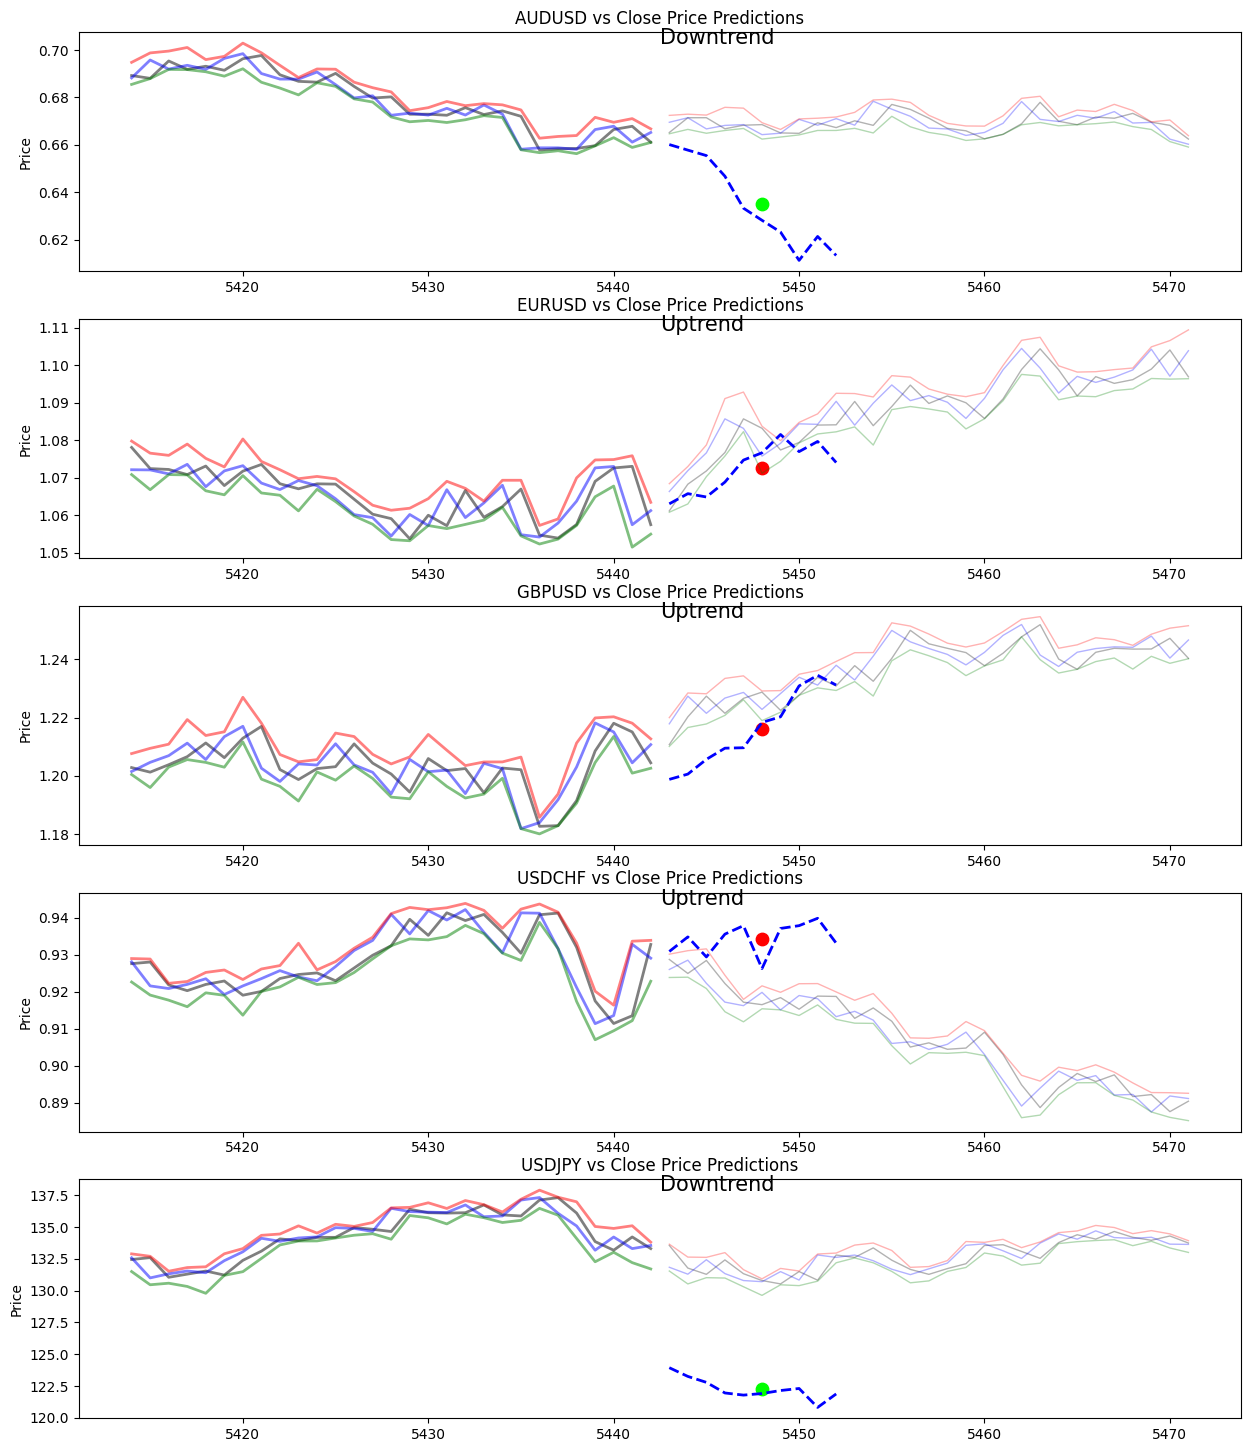

None

Refit models with latest data...
Completed!


In [106]:
# Forecasting step by step ForecastorAutoregMultiSeries with exog
from IPython import display
import time
import matplotlib.pyplot as plt

start_step = 5000
end_step = start_step + 200
interval_steps = 29 # for ploting
pred_steps = 10
lag = 999
refit_iter = 10

predict_levels = ['AUDUSD_Close', 'EURUSD_Close', 'GBPUSD_Close', 'USDCHF_Close', 'USDJPY_Close']
symbols = ['AUDUSD', 'EURUSD', 'GBPUSD', 'USDCHF', 'USDJPY']
models = {}
predictions = {}
series = list(data.columns[~data.columns.str.contains('InterestRate')])
exogs = {}
pred_avg = {}
num_symbols = len(symbols)
color = {}

for symbol in symbols:
    exogs[symbol] = []
    for e in list(data.columns[data.columns.str.contains('InterestRate')]):
        if (symbol[:3] in e) or (symbol[-3:] in e):
            exogs[symbol].append(e)

while True:
    for _ in range(refit_iter):
        if (end_step+interval_steps) >= len(data_):
            break

        fig, ax = plt.subplots(nrows=num_symbols, ncols=1, figsize=(15, 18))

        for num in range(num_symbols):
            models[f'{symbols[num].lower()}'] = load_forecaster(f'./models/skforecast/{symbols[num].lower()}_lgbm_multivariate_forecaster.py', verbose=False)
            predictions[symbols[num]] = models.get(f'{symbols[num].lower()}').predict(steps=pred_steps, levels=f'{predict_levels[num]}', last_window=data_[start_step:end_step][series], exog=data_[end_step:end_step+pred_steps][exogs[symbols[num]]])
            pred_avg[symbols[num]] = sum(predictions[symbols[num]][predict_levels[num]])/pred_steps
        
            # ax[num].set_xticklabels(test_data['Datetime'])
            ax[num].set_title(f'{symbols[num]} vs Close Price Predictions')
            ax[num].set_ylabel('Price')
            # ax[num].set_xlabel('Datetime')
            # ax[num].legend()

            data_[end_step-interval_steps:end_step][f'{symbols[num]}_Open'].plot(ax=ax[num], linewidth=2, label='LW Open', color='black', alpha=0.5)
            data_[end_step:end_step+interval_steps][f'{symbols[num]}_Open'].plot(ax=ax[num], linewidth=1, label='Test Open', color='black', alpha=0.3)
            data_[end_step-interval_steps:end_step][f'{symbols[num]}_Close'].plot(ax=ax[num], linewidth=2, label='LW Close', color='blue', alpha=0.5)
            data_[end_step:end_step+interval_steps][f'{symbols[num]}_Close'].plot(ax=ax[num], linewidth=1, label='Test Close', color='blue', alpha=0.3)
            data_[end_step-interval_steps:end_step][f'{symbols[num]}_High'].plot(ax=ax[num], linewidth=2, label='LW High', color='red', alpha=0.5)
            data_[end_step:end_step+interval_steps][f'{symbols[num]}_High'].plot(ax=ax[num], linewidth=1, label='Test High', color='red', alpha=0.3)
            data_[end_step-interval_steps:end_step][f'{symbols[num]}_Low'].plot(ax=ax[num], linewidth=2, label='LW Low', color='green', alpha=0.5)
            data_[end_step:end_step+interval_steps][f'{symbols[num]}_Low'].plot(ax=ax[num], linewidth=1, label='Test Low', color='green', alpha=0.3)

            predictions[symbols[num]].loc[end_step:end_step+interval_steps][predict_levels[num]].plot(ax=ax[num], linewidth=2, label='Pred Close', color='blue', style='--')

            if (pred_avg[symbols[num]]/predictions[symbols[num]].loc[end_step][predict_levels[num]]) > 1.003:
                ax[num].text(0.5, 0.95, f"Uptrend", size=15, transform=ax[num].transAxes)
                color[f'{symbols[num]}'] = 'red'
            elif (pred_avg[symbols[num]]/predictions[symbols[num]].loc[end_step][predict_levels[num]]) < 0.997:
                ax[num].text(0.5, 0.95, f"Downtrend", size=15, transform=ax[num].transAxes)
                color[f'{symbols[num]}'] = 'lime'
            else:
                ax[num].text(0.5, 0.95, f"", size=15, transform=ax[num].transAxes)
                color[f'{symbols[num]}'] = 'black'
            
            ax[num].scatter(end_step+5, pred_avg[symbols[num]], color=color[f'{symbols[num]}'], s=80)

        display.clear_output(wait=True)
        display.display(plt.show())

        end_step += 1
        time.sleep(0.1)
        
    if end_step > len(train_data):
        print('Refit models with latest data...')
        for num in range(len(symbols)):
            models[f'{symbols[num].lower()}'].fit(series=data_[end_step-lag:end_step+pred_steps-1][series], exog=data_[end_step-lag:end_step+pred_steps-1][exogs[symbols[num]]])
    if (end_step+interval_steps) >= data_.index[-1]:
        break


print('Completed!')

In [102]:
len(data_)

5474

### Conclusion
The time series forecast prediction using `skforecast` with `LGBMRegressor` shows pretty good performance on the given train data, but low performance on unseen future data.
A workflow pipeline should be used, which includes the latest data re-standardization and retraining for future every time period.